In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [76]:
df_films = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\films.csv")
df_characters = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\characters.csv")
df_crew_members = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\crew_members.csv")
df_soundtracks = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\soundtracks.csv")
df_settings_and_world = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\settings_and_world.csv")
df_animation_settings = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\animation_settings.csv")
df_symbolism_and_motifs = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\symbolism_and_motifs.csv")
df_release_info = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\release_info.csv")
df_sociopolitical = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\sociopolitical.csv")
df_rating = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\rating.csv")
df_cultural_info = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\cultural_info.csv")
df_parents_guide = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\parents_guide.csv")
df_franchise = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\franchise.csv")
df_story_and_themes = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Film Data Analytics Project\data\raw\story_and_themes.csv")

In [63]:
df_films.shape

(500, 15)

In [64]:
df_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   film_id                500 non-null    int64 
 1   film_name              500 non-null    object
 2   release_year           500 non-null    int64 
 3   genre                  500 non-null    object
 4   film_duration          500 non-null    int64 
 5   film_country           500 non-null    object
 6   film_language          500 non-null    object
 7   film_budget            500 non-null    int64 
 8   film_box_office        500 non-null    int64 
 9   film_votes_count       500 non-null    int64 
 10  film_release_platform  500 non-null    object
 11  film_name_word_count   500 non-null    int64 
 12  film_age_rating        500 non-null    object
 13  film_awards_count      500 non-null    int64 
 14  studio_name            500 non-null    object
dtypes: int64(8), object(7)


In [65]:
df_films.describe()

,film_id,release_year,film_duration,film_budget,film_box_office,film_votes_count,film_name_word_count,film_awards_count
count,500.000000,500.000000,500.00000,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.00000
mean,250.500000,2011.192000,123.78000,1.286950e+08,6.409330e+08,9.780400e+06,3.210000,2.55000
std,144.481833,10.343167,23.00892,7.093803e+07,3.380761e+08,5.465290e+06,1.707551,2.17185
min,1.000000,1939.000000,81.00000,3.900000e+06,2.000000e+08,1.000000e+05,1.000000,0.00000
25%,125.750000,2006.000000,107.00000,7.500000e+07,4.075837e+08,7.500000e+06,2.000000,1.00000
50%,250.500000,2013.000000,123.00000,1.250000e+08,5.292000e+08,9.500000e+06,3.000000,2.00000
75%,375.250000,2018.000000,138.00000,1.780000e+08,7.866666e+08,1.300000e+07,4.000000,3.00000
max,500.000000,2025.000000,221.00000,3.790000e+08,2.923706e+09,2.700000e+07,8.000000,20.00000


In [66]:
df_films.isna().sum().sort_values(ascending=False)

film_id                  0
film_name                0
release_year             0
genre                    0
film_duration            0
film_country             0
film_language            0
film_budget              0
film_box_office          0
film_votes_count         0
film_release_platform    0
film_name_word_count     0
film_age_rating          0
film_awards_count        0
studio_name              0
dtype: int64

In [67]:
df_films.duplicated(subset="film_id").sum()

np.int64(0)

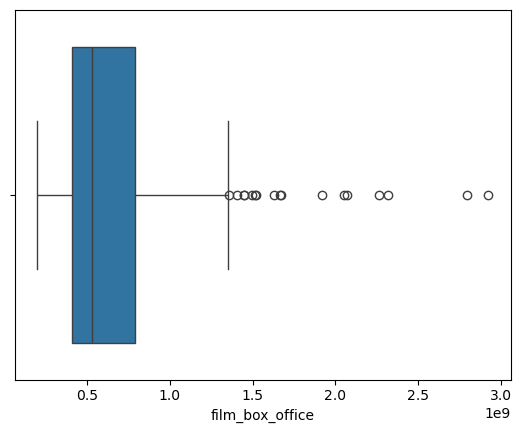

In [68]:
sns.boxplot(x=df_films["film_box_office"])
plt.show()

In [69]:
COUNTRY_MAP = {
    "NewZealand": "New Zealand",
    "HongKong": "Hong Kong",
}

def _fix_token(t: str) -> str:
    t = re.sub(r"\s+", " ", t.strip())
    return COUNTRY_MAP.get(t, t)

def normalize_country(val):
    if pd.isna(val):
        return val
    parts = [_fix_token(p) for p in str(val).split("|") if p.strip()]
    parts = sorted(set(parts))  
    return "|".join(parts)

df_films["film_country"] = df_films["film_country"].apply(normalize_country)

df_films["film_country"].value_counts()



film_country
USA                390
UK|USA              48
China               28
New Zealand|USA      7
China|USA            7
Japan                4
Australia|USA        4
France|USA           3
Japan|USA            2
Taiwan|USA           1
France               1
Australia|UK         1
India|UK             1
Canada|USA           1
Hong Kong|USA        1
Germany|USA          1
Name: count, dtype: int64

In [70]:
df_films["film_release_platform"].nunique()
df_films = df_films.drop(columns=["film_release_platform"])

In [71]:
df_films["film_age_rating"] = df_films["film_age_rating"].str.upper().str.strip()
df_films["film_age_rating"].head(10).info

<bound method Series.info of 0    PG-13
1    PG-13
2    PG-13
3    PG-13
4    PG-13
5    PG-13
6       PG
7    PG-13
8       PG
9    PG-13
Name: film_age_rating, dtype: object>

In [72]:
map_studio = {
    "MGM": "Metro-Goldwyn-Mayer",
    "20th Century Studios": "20th Century Fox"
}
df_films["studio_name"] = df_films["studio_name"].replace(map_studio)

map_dw = {
    "DreamWorks Animation": "DreamWorks",
    "DreamWorks Pictures": "DreamWorks",
}
df_films["studio_name"] = df_films["studio_name"].replace(map_dw)

# kontrol
df_films["studio_name"].value_counts().loc["DreamWorks"]

df_films["studio_name"].value_counts().head(15)



studio_name
Warner Bros.                  83
20th Century Fox              54
Universal Pictures            45
Walt Disney Pictures          43
Paramount Pictures            39
Marvel Studios                35
Columbia Pictures             32
DreamWorks                    29
Pixar Animation Studios       21
Illumination Entertainment    12
Lucasfilm                      9
Eon Productions                9
Alibaba Pictures               7
New Line Cinema                7
Lionsgate                      7
Name: count, dtype: int64

In [73]:

df_crew_members["award_won_for_film"] = df_crew_members["award_won_for_film"].astype(bool)
df_characters["is_protagonist"] = df_characters["is_protagonist"].astype(bool)
df_cultural_info["accent_comedy_used"] = df_cultural_info["accent_comedy_used"].astype(bool)
df_cultural_info["language_switching"] = df_cultural_info["language_switching"].astype(bool)
df_cultural_info["cultural_instrument_usage"] = df_cultural_info["cultural_instrument_usage"].astype(bool)
df_cultural_info["choreographic_dance_present"] = df_cultural_info["choreographic_dance_present"].astype(bool)
# animation_settings
df_animation_settings["hand_drawn_elements_present"] = df_animation_settings["hand_drawn_elements_present"].astype(bool)
df_animation_settings["motion_capture_used"] = df_animation_settings["motion_capture_used"].astype(bool)
df_animation_settings["stop_motion_used"] = df_animation_settings["stop_motion_used"].astype(bool)
df_animation_settings["ai_generated_elements_present"] = df_animation_settings["ai_generated_elements_present"].astype(bool)
df_animation_settings["animation_award_won"] = df_animation_settings["animation_award_won"].astype(bool)

# franchise
df_franchise["is_sequel"] = df_franchise["is_sequel"].astype(bool)

# parents_guide
df_parents_guide["sexual_content_present"] = df_parents_guide["sexual_content_present"].astype(bool)
df_parents_guide["substance_use_present"] = df_parents_guide["substance_use_present"].astype(bool)
df_parents_guide["age_rating_source"] = df_parents_guide["age_rating_source"].astype(bool)

# release_info
df_release_info["holiday_release"] = df_release_info["holiday_release"].astype(bool)
df_release_info["covid_era_release"] = df_release_info["covid_era_release"].astype(bool)
df_release_info["simultaneous_release"] = df_release_info["simultaneous_release"].astype(bool)

# settings_and_world
df_settings_and_world["fictional_world_present"] = df_settings_and_world["fictional_world_present"].astype(bool)
df_settings_and_world["real_location_reference"] = df_settings_and_world["real_location_reference"].astype(bool)
df_settings_and_world["weather_motif_present"] = df_settings_and_world["weather_motif_present"].astype(bool)

# sociopolitical
df_sociopolitical["political_content_present"] = df_sociopolitical["political_content_present"].astype(bool)
df_sociopolitical["lgbt_representation_present"] = df_sociopolitical["lgbt_representation_present"].astype(bool)
df_sociopolitical["gender_equality_focus"] = df_sociopolitical["gender_equality_focus"].astype(bool)
df_sociopolitical["war_or_conflict_related"] = df_sociopolitical["war_or_conflict_related"].astype(bool)
df_sociopolitical["environmental_theme_present"] = df_sociopolitical["environmental_theme_present"].astype(bool)
df_sociopolitical["propaganda_tone"] = df_sociopolitical["propaganda_tone"].astype(bool)

# soundtracks
df_soundtracks["is_main_theme"] = df_soundtracks["is_main_theme"].astype(bool)
df_soundtracks["vocal_presence"] = df_soundtracks["vocal_presence"].astype(bool)
df_soundtracks["cultural_instrument_usage"] = df_soundtracks["cultural_instrument_usage"].astype(bool)
df_soundtracks["diegetic"] = df_soundtracks["diegetic"].astype(bool)
df_soundtracks["award_won"] = df_soundtracks["award_won"].astype(bool)

# story_and_theme
df_story_and_themes["has_major_twist"] = df_story_and_themes["has_major_twist"].astype(bool)
df_story_and_themes["has_open_ending"] = df_story_and_themes["has_open_ending"].astype(bool)
df_story_and_themes["moral_dilemma_present"] = df_story_and_themes["moral_dilemma_present"].astype(bool)
df_story_and_themes["based_on_true_story"] = df_story_and_themes["based_on_true_story"].astype(bool)

# symbolism_and_motifs
df_symbolism_and_motifs["color_symbolism_present"] = df_symbolism_and_motifs["color_symbolism_present"].astype(bool)
df_symbolism_and_motifs["water_motif_present"] = df_symbolism_and_motifs["water_motif_present"].astype(bool)
df_symbolism_and_motifs["fire_motif_present"] = df_symbolism_and_motifs["fire_motif_present"].astype(bool)
df_symbolism_and_motifs["animal_symbolism_present"] = df_symbolism_and_motifs["animal_symbolism_present"].astype(bool)
df_symbolism_and_motifs["dream_sequence_present"] = df_symbolism_and_motifs["dream_sequence_present"].astype(bool)
df_symbolism_and_motifs["mirror_or_reflection_motif"] = df_symbolism_and_motifs["mirror_or_reflection_motif"].astype(bool)
df_symbolism_and_motifs["recurring_object_symbol"] = df_symbolism_and_motifs["recurring_object_symbol"].astype(bool)
df_symbolism_and_motifs["death_symbolism_present"] = df_symbolism_and_motifs["death_symbolism_present"].astype(bool)
df_symbolism_and_motifs["religious_symbolism_present"] = df_symbolism_and_motifs["religious_symbolism_present"].astype(bool)
df_symbolism_and_motifs["technological_symbolism_present"] = df_symbolism_and_motifs["technological_symbolism_present"].astype(bool)
df_symbolism_and_motifs["nature_vs_industry_theme"] = df_symbolism_and_motifs["nature_vs_industry_theme"].astype(bool)
df_symbolism_and_motifs["symbolic_resolution"] = df_symbolism_and_motifs["symbolic_resolution"].astype(bool)


In [74]:
df_animation_settings.head(3)
df_parents_guide.head(3)
df_release_info.head(3)
df_settings_and_world.head(3)
df_sociopolitical.head(3)
df_soundtracks.head(3)
df_story_and_themes.head(3)
df_symbolism_and_motifs.head(3)


,film_id,symbolism_density,color_symbolism_present,water_motif_present,fire_motif_present,animal_symbolism_present,dream_sequence_present,mirror_or_reflection_motif,recurring_object_symbol,death_symbolism_present,religious_symbolism_present,technological_symbolism_present,nature_vs_industry_theme,visual_metaphor_strength,symbolic_resolution
0,1,0.88,True,False,True,True,False,False,False,True,True,True,True,0.85,True
1,2,0.62,True,False,True,False,False,False,True,True,False,True,False,0.60,True
2,3,0.92,True,True,True,True,False,False,True,True,True,True,True,0.90,True
